# Feature Detection, Matching, Segmentation

Nina Miolane, UC Santa Barbara

<center><img src="figs/03_main2.png" width=800px alt="default"/></center>


# Last Lectures

- **01: Image Formation Models (Ch. 2)**
- **02: Image Operators and Transforms (Ch. 3)**
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We have seen:
- how 2D images are acquired from a 3D scene,
- once acquired, which operations we can perform on them.

# This Lecture

- 01: Image Formation Models (Ch. 2)
- 02: Image Operators and Transforms (Ch. 3)
- **03: Feature Detection, Matching, Segmentation (Ch. 7)**
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We will start using image processing tools, to:
- extract meaningful features from images,
- match features from pairs of images.

<center><img src="figs/03_main.png" width=300px alt="default"/></center>

# Vocabulary:

$\color{#EF5645}{\text{Features}}$ are characteristics extracted from the image such as points, edges, contours, lines, etc.

$\color{#EF5645}{\text{Matching}}$, also called alignment, correspondence, or registration, is the process of finding which features in one image are also present in another image.

<center><img src="figs/03_main2.png" width=700px alt="default"/></center>


Consider the two pairs of images shown in the Figure.

For the first pair:
- align the two images so that they can be seamlessly stitched into a composite mosaic?

For the second pair:
- establish a dense set of correspondences so that a 3D model can be constructed?

$\rightarrow$ what kinds of features should you detect and then match?


# Feature Detection, Matching, Segmentation

- **[Point and Patches](#sec-syllabus)**

- [Edges and Contours](#sec-ece)

- [Contour Tracing](#sec-ece)

- [Segmentation](#sec-ece)

# Keypoints and Keypoint Descriptors

$\color{#EF5645}{\text{Keypoints}}$, also called interest points or sometimes corners, are specific locations in the images such as mountain peaks, building corners, doorways, organ's anatomical landmarks, etc.

<center><img src="figs/03_faces.png" width=500px alt="default"/></center>

$\color{#EF5645}{\text{A keypoint descriptor}}$ is a vector that describes the appearance of the pixel patch around the keypoint. 

$\color{#047C91}{\text{Example}}$: Histogram of the intensities present around this keypoint.

# Why Keypoints and Descriptors?

- Object/people recognition (pre-deep learning or with small datasets). 
- Finding corresponding keypoints in different images is useful for stitching, compute camera pose, perform 3D reconstruction.
    
<center><img src="figs/03_faces.png" width=600px alt="default"/></center>

# Keypoints Detection and Matching

Three steps:
- **Feature detection: Find keypoint location**
- Feature description: Compute keypoint descriptor
- Feature matching: Find corresponding keypoints in a pair of images

<center><img src="figs/03_pipeline.png" width=500px alt="default"/></center>

# Detection: Intuition

$\color{#EF5645}{\text{Goal}}$: Find keypoints, i.e. specific image locations that:
- **are easy to recognize and track,**
- will be helpful to perform matching between images.

<center><img src="figs/03_point_detection.png" width=800px alt="default"/></center>



# Detection: Intuition

<center><img src="figs/03_point_detection.png" width=600px alt="default"/></center>

$\color{#EF5645}{\text{Conclusion}}$: Contrast changes, i.e. gradients, are important:
- texture-less patches are almost impossible to localize,
- patches with large contrast changes (gradients) are easier,
- patches with gradient in at least two directions are the easiest.

# Detection: Intuition

$\color{#EF5645}{\text{Goal}}$: Find keypoints, i.e. specific image locations that:
- are easy to recognize and track,
- **will be helpful to perform matching between images.**

<center><img src="figs/03_invariance_geometry.png" width=450px alt="default"/></center>

$\color{#EF5645}{\text{Conclusion}}$: 
- Need invariance wrt geometric transformations or camera poses.

# Detection: Intuition

$\color{#EF5645}{\text{Goal}}$: Find keypoints, i.e. specific image locations that:
- are easy to recognize and track,
- **will be helpful to perform matching between images.**

<center><img src="figs/03_invariance_colors.png" width=800px alt="default"/></center>

$\color{#EF5645}{\text{Remarks}}$: 
- Need invariance with respect to lightning variations, coloring, noise, blur.

# Feature Detection: Desiderata

- Patch extraction needs to be repeatable and accurate
  - Invariant to translation, rotation, scale changes
  - Robust or covariant to out-ot-plane (affine) transformations
  - Robust to lighning variations, color histograms, noise or blur
- Quantity: Need a sufficient number of patches to cover the object
- Distinctiveness: Patch should contain interesting structure
- Efficiency: Fast enough to run in real-time

# Many Detectors Available

- Hessian & Harris [Beaudet '78][Harris '88]
- Laplacian, DoG [Lindeberg '98][Lowe '99]
- Harris-/Hessian-Laplace [Mikolajczyk & Schmid '01]
- Harris-/Hessian-Affine [Mikolajczyk & Schmid '04]
- EBR and IBR [Tuytelaarss & Van Gool '04]
- MSER [Matas '02]
- Salient Regions [Kadir & Brady '01]
- Many others...

= Basic building blocks for many applications. We will see some of them.


# Harris Detector

$\color{#6D7D33}{\text{Intuition}}$: 
- If we shift a small window around keypoint, its content change radically.

<center><img src="figs/03_harris.png" width=400px alt="default"/></center>

$\color{#6D7D33}{\text{Math}}$:  Change of intensity for shift $(u, v)$ in image $I$:
$$ E_{AC}(u, v) = \sum_{x, y} w(x, y) \left( I(x+u, y+v) - I(x, y)\right)^2,$$
- where $w$ are weights, also called the window function,
- $E_{AC}$ is known as the auto-correlation function.

# Approximation

Using a Taylor expansion: $I(x +u, y +v) \simeq I(x, y) + \nabla I (x, y)^T (u, v)$ we get:
$$\begin{align*}
E_{AC}(u, v)
&= \sum_{x, y} w(x, y) \left( I(x+u, y+v) - I(x, y)\right)^2 \\
&\simeq \sum_{x, y} w(x, y) \left( I(x, y) + \nabla I (x, y)^T (u, v) - I(x, y)\right)^2 \\
&= \sum_{x, y} w(x, y) \left(\nabla I (x, y)^T (u, v)\right)^2 \\
&= \sum_{x, y} w(x, y)  (u, v)^T \nabla I (x, y) \nabla I (x, y)^T (u, v)\\
&= (u, v)^T A(x, y) (u, v),
\end{align*}$$
where $A$ is the $\color{#EF5645}{\text{auto-correlation matrix}}$: $A = \sum_{x, y} w(x, y) \begin{bmatrix} I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}$.

# Gradients of images

$\color{#EF5645}{\text{The gradient}}$ of the image $I$, written: 
$$\nabla I (x, y) = (I_x, I_y)(x, y) = \left(\frac{\partial I}{\partial x},\frac{\partial I}{\partial y} \right)(x, y), $$
is computed as:
- $\frac{\partial I}{\partial x}(x, y) = \lim_{dx \rightarrow 0} \frac{I(x + dx, y) - I(x, y)}{dx} \simeq \frac{I(x+1, y) - I(x-1,y)}{2}$
- $\frac{\partial I}{\partial y}(x, y) = \lim_{dy \rightarrow 0} \frac{I(x, y+dy) - I(x, y)}{dy} \simeq \frac{I(x, y+1) - I(x, y-1)}{2}$

<center><img src="figs/03_gradients.png" width=900px alt="default"/></center>

# $A$ for Axis-Aligned Corner

$\color{#047C91}{\text{Example}}$:  Axis-aligned corner.

<center><img src="figs/03_axis_aligned_corner.png" width=130px alt="default"/></center>

- The auto-correlation matrix $A$ writes, for some $\lambda_x, \lambda_y$:
$$A 
= \sum_{x, y} w(x, y) \begin{bmatrix} I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}
= \begin{bmatrix}  \sum_{x, y} w(x, y) I_x^2 & \sum_{x, y} w(x, y)  I_x I_y \\ \sum_{x, y} w(x, y)  I_x I_y & \sum_{x, y} w(x, y)  I_y^2 \end{bmatrix}
= \begin{bmatrix} \lambda_x & 0 \\ 0 & \lambda_y \end{bmatrix}.$$


- Conversely, if $A$ is diagonal with large $\lambda$'s, there is an axis-aligned corner. 

# General A

Corners might not be axis-aligned.

<center><img src="figs/03_rotated_corner.jpg" width=200px alt="default"/></center>

- Since $A$ is symmetric, write eigenvalues decomposition (spectral theorem):
$$A 
= \begin{bmatrix}  \sum_{x, y} w(x, y) I_x^2 & \sum_{x, y} w(x, y)  I_x I_y \\ \sum_{x, y} w(x, y)  I_x I_y & \sum_{x, y} w(x, y)  I_y^2 \end{bmatrix}
= R^{-1} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} R,$$
for a rotation matrix $R$.

# Visualization of $A$

The eigenvalue decomposition of  $A$ allows us to visualize it as an ellipse:
- with axis lengths determined by the eigenvalues,
- with orientation determined by $R$, i.e. the eigenvectors.

<center><img src="figs/03_ellipse.png" width=700px alt="default"/></center>

# Classification of Image Locations with $A$

 Computing $A(x, y)$ for each location $(x, y)$:
- allows us to classify the type of points $(x, y)$ we are looking at.

<center><img src="figs/03_eigenvalues.png" width=750px alt="default"/></center>

However, computing an eigenvalue decomposition is computationally expensive.

# Corner Response Function $\theta$

Using determinant and trace of $A$: 
- gives us insights on the eigenvalues, without having to compute them.

$\color{#EF5645}{\text{The Corner Response Function}}$ is defined as:
$$\theta = \det(A) - \alpha \text{trace} (A)^2 = \lambda_1 \lambda_2 - \alpha (\lambda_1 + \lambda_2)^2.$$

$\color{#EF5645}{\text{Remarks}}$:
- Compute $\theta$ at each $(x, y)$.
- Constant $\alpha$ often taken between 0.04 and 0.06

# Harris Detector: Window Function $w$?

$\color{#EF5645}{\text{Recall}}$: The autocorrelation matrix $A$ depends on the choice of window function $w$:

$$A 
= \begin{bmatrix}  \sum_{x, y} w(x, y) I_x^2 & \sum_{x, y} w(x, y)  I_x I_y \\ \sum_{x, y} w(x, y)  I_x I_y & \sum_{x, y} w(x, y)  I_y^2 \end{bmatrix}.$$

$\color{#EF5645}{\text{Options for $w$:}}$ : Uniform window or smooth window with Gaussian kernel
<center><img src="figs/03_window.png" width=800px alt="default"/></center>


# Choose Window Function $w$?

- Option 1: Uniform window
  - $A = \sum_{x, y \text{ in window}} \begin{bmatrix}  I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}$
  - Problem: not rotation invariant
  
- Option 2: Smooth with Gaussian Kernel
  - $A = g * \begin{bmatrix}  I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}$
  - Rotation invariant: better!
  

$\color{#EF5645}{\text{Remark:}}$ The corner response function with Gaussian window $w$ writes:

$$\theta = g(I_x^2)g(I_y^2) - (g(I_x I_y))^2 - \alpha \left( g(I_x^2)+g(I_y^2)\right)^2.$$

# In practice: Harris Detector [Harris'88]

1. Compute $\theta$ on the image
2. Select point $(x, y)$ where:
- $\theta(x, y) >$ threshold



<center><img src="figs/03_summary_harris.png" width=350px alt="default"/></center>

<center><img src="figs/03_theta.png" width=350px alt="default"/></center>




In [66]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

# Example: Create an Image

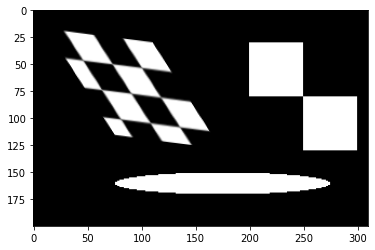

In [70]:
image_geom = data.checkerboard()[:90, :90]

# # Sheared checkerboard
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7, translation=(110, 30))
image_geom = warp(image_geom, tform.inverse, output_shape=(200, 310))

# Ellipse
rr, cc = ellipse(160, 175, 10, 100)
image_geom[rr, cc] = 1

# Two squares
image_geom[30:80, 200:250] = 1; image_geom[80:130, 250:300] = 1

fig, ax = plt.subplots()
ax.imshow(image_geom, cmap=plt.cm.gray);

# Example: Compute $\theta$

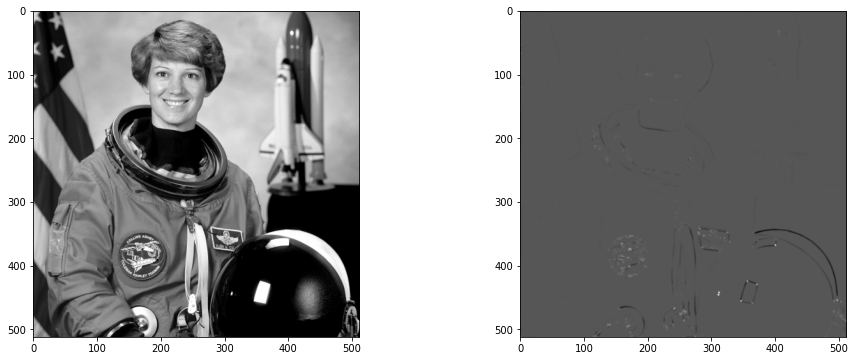

In [84]:
image = rgb2gray(data.astronaut())
#image = image_geom
thetas = corner_harris(image)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
axes[0].imshow(image, cmap=plt.cm.gray);
axes[1].imshow(thetas, cmap=plt.cm.gray);

# Example: Find Local Maxima of $\theta$

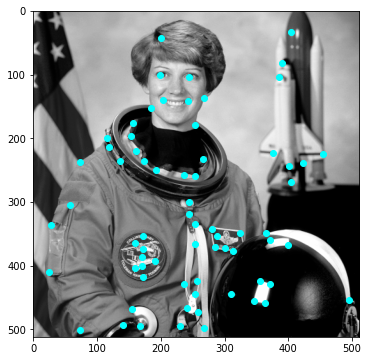

In [85]:
coords = corner_peaks(corner_harris(image), min_distance=10, threshold_rel=0.02)
#print(coords)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(
    coords[:, 1], coords[:, 0], # NB: coordinates are inverted!
    color='cyan', marker='o',linestyle='None', markersize=6)
plt.show()

# An Alternative: Hessian Detector

$\color{#EF5645}{\text{The Hessian}}$ of image $I$ is the matrix of the second derivatives of $I$:
$$H(I)(x, y) = \begin{bmatrix} I_{xx} & I_{xy} \\ I_{xy} & I_{yy} \end{bmatrix}.$$


$\color{#EF5645}{\text{Hessian Detector}}$ searches for strong derivatives in both $x$ and $y$ directions.
- Compute $\det H(I)  = I_{xx}I_{yy} - I_{xy}^2$
- Select point $(x, y)$ where:
  - $\det H(I)(x, y) >$ threshold.

<center><img src="figs/03_hessian.png" width=350px alt="default"/></center>

- Compute $\det H(I)(x, y)$

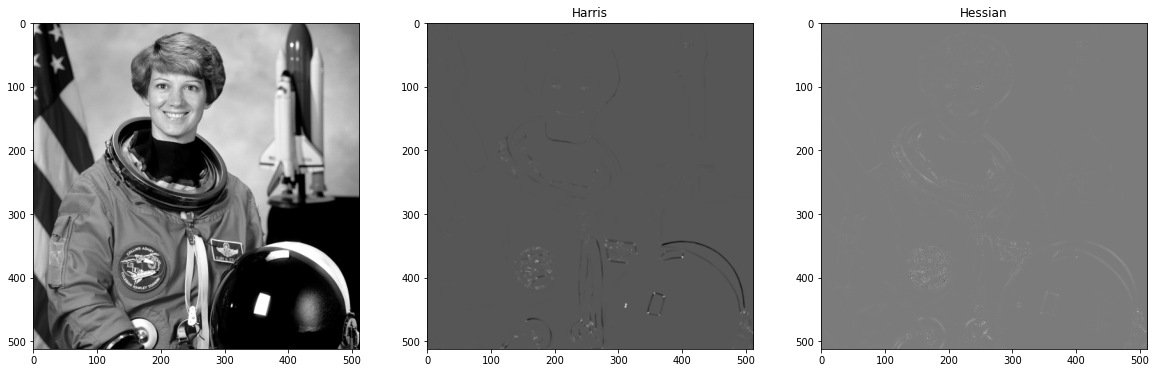

In [95]:
from skimage.feature import hessian_matrix_det

image = rgb2gray(data.astronaut())
#image = image_geom

thetas = corner_harris(image)
dets = hessian_matrix_det(image)

fig, axes = plt.subplots(ncols=3, figsize=(20, 6))
axes[0].imshow(image, cmap=plt.cm.gray);
axes[1].imshow(thetas, cmap=plt.cm.gray); axes[1].set_title("Harris")
axes[2].imshow(-dets, cmap=plt.cm.gray); axes[2].set_title("Hessian");

- Select point $(x, y)$ where $\det H(I)(x, y) >$ threshold.

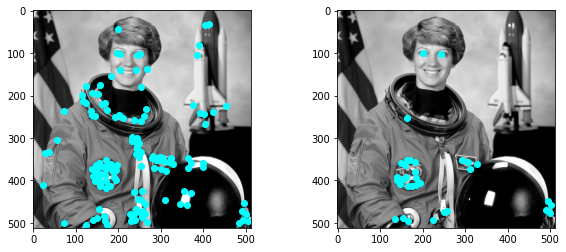

In [97]:
coords_harris = corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.02)
coords_hessian = corner_peaks(hessian_matrix_det(image), min_distance=5, threshold_rel=0.2)

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].plot(
    coords_harris[:, 1], coords_harris[:, 0], 
    color='cyan', marker='o', linestyle='None', markersize=6)
ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].plot(
    coords_hessian[:, 1], coords_hessian[:, 0],
    color='cyan', marker='o', linestyle='None', markersize=6)
plt.show()

# Another Alternative: Difference of Gaussians (DoG)

$\color{#EF5645}{\text{Recall}}$: one step of the Laplacian pyramid: difference of Gaussians.

- Compute: $DoG(x, y) = g_\sigma^L * I - g_\sigma^H * I$
- Select point $(x, y)$:
  - for $DoG(x, y) >$ threshold

<center><img src="figs/02_laplace_block.png" width=300px alt="default"/></center>

In [98]:
from skimage.filters import difference_of_gaussians

- Compute $DoG(x, y)$
- Select points $(x, y)$ such that $DoG(x, y) >$ threshold

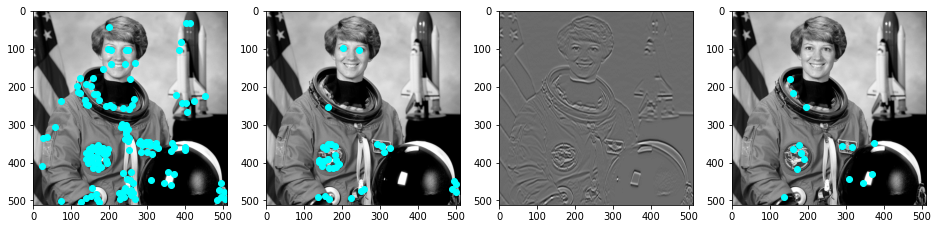

In [104]:
diff_of_g = difference_of_gaussians(image=image, low_sigma=2, high_sigma=2.6, channel_axis=-1)
coords_dog = corner_peaks(diff_of_g, min_distance=10, threshold_rel=0.6)

fig, ax = plt.subplots(ncols=4, figsize=(16, 4))
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].plot(coords_harris[:, 1], coords_harris[:, 0],
           color='cyan', marker='o', linestyle='None', markersize=6)
ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].plot(coords_hessian[:, 1], coords_hessian[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax[2].imshow(diff_of_g, cmap=plt.cm.gray)
ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].plot(coords_dog[:, 1], coords_dog[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
plt.show()

# Invariances

Harris and Hessian are invariant to:
- Illumination changes
- Translation
- Rotation

But not to scaling.


<center><img src="figs/03_scal.png" width=800px alt="default"/></center>

# Towards Detectors that are Scale Invariant

Consider regions (e.g. circles) of different sizes around a point in the image:
- Regions of corresponding sizes will look the same in both images
- How to find corresponding circles, independently in both images?

<center><img src="figs/03_scal_inv.png" width=400px alt="default"/></center>

$\rightarrow$ Go multiscale with pyramids.

# Naive Scale Invariant Detection

Consider two images:
- Compute Gaussian pyramid of both 
- Performing N × N pairwise comparisons to find the best match. 

<center><img src="figs/03_gaussian_pyr.png" width=550px alt="default"/></center>

But too expensive to be of practical use.

# Scale-Invariant Detection

$\color{#6D7D33}{\text{Solution}}$: Compute "scale-invariant" keypoint directly from __one__ image:
- Define a function $f$ on the region (circle) which is "scale-invariant":
  - Same for corresponding regions even if they are at different scales, e.g.: average intensity
  - For point $(x, y)$: $f_{x, y}$ is function of region size (circle radius).
- For each $(x, y)$, find local maximum of $f$. If maximum: keypoint!

$\rightarrow$ Region size, for which the maximum is achieved, is invariant to image scale.

<center><img src="figs/03_scal_inv_function.png" width=800px alt="default"/></center>

# Good $f$ for Scale Invariant Detection?

= function that has one stable sharp peak, e.g.  that responds to contrast (sharp local intensity changes): gradients!

<center><img src="figs/03_scal_inv_options.png" width=1600px alt="default"/></center>

# Scale Invariant Detector with Laplacian Pyramid

Laplacian Pyramid: take $f$ to be the difference of Gaussians at each level

<center><img src="figs/03_ateachpoint.png" width=400px alt="default"/></center>

# Example: Consider a Keypoint

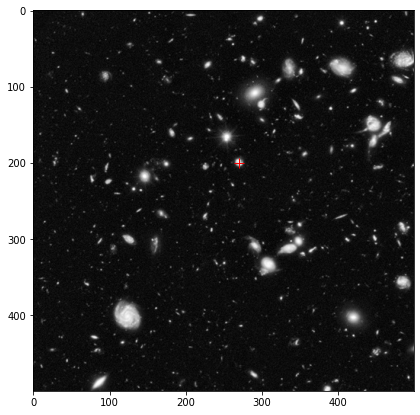

In [107]:
x0, y0 = 270, 200 #123, 401 #270, 200 
image = rgb2gray(data.hubble_deep_field()[0:500, 0:500])
fig, ax = plt.subplots(1, 1, figsize=(7,7))

ax.imshow(image, cmap=plt.cm.gray)
ax.plot(x0, y0, color="red", marker="+", markersize=10);

# Compute Laplace Pyramid

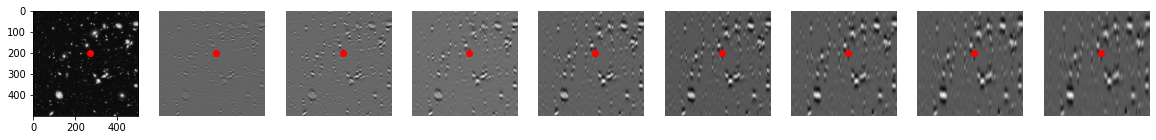

In [108]:
import numpy as np

image_pyramid = []
sigmas = np.arange(1, 16, 2)

fig, axes = plt.subplots(ncols=len(sigmas)+1, figsize=(20, 6))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].plot(x0, y0, color="red", marker="o");
for i, sigma in enumerate(sigmas):
    diff_of_g = difference_of_gaussians(
        image=image, low_sigma=sigma, high_sigma=sigma+2, channel_axis=-1)
    axes[i+1].imshow(diff_of_g, cmap=plt.cm.gray)
    axes[i+1].plot(x0, y0, color='red', marker='o', linestyle='None', markersize=6)
    axes[i+1].axis("off")
    image_pyramid.append(diff_of_g)

# Visualize $f$ at the Keypoint

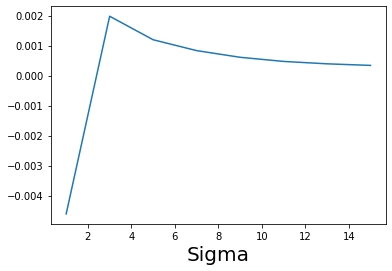

In [109]:
plt.plot(sigmas, [el[x0, y0] for el in image_pyramid])
plt.xlabel("Sigma", fontsize=20);

# Keypoint's Characteristic Scale

$\color{#EF5645}{\text{The characteristic scale}}$ is the scale that produces the peak of response in DoG.

<center><img src="figs/03_scale.png" width=800px alt="default"/></center>

# Scale Invariant Detectors


<center><img src="figs/03_detectors.png" width=950px alt="default"/></center>



$\color{#EF5645}{\text{Remark}}$: Laplacian pyramid that we introduced with DoG:
- only a fast approximation of the true Laplacian Pyramid.



# Summary: Scale Invariant Detection

- $\color{#6D7D33}{\text{Given}}$: Two images of the same scene with a large scale  difference between them.

- $\color{#6D7D33}{\text{Goal}}$: Find the same keypoints independently in each image. 

- $\color{#6D7D33}{\text{Solution}}$:  Search for maxima of suitable $f$ in scale and in space.

- Two strategies...
  - Laplacian‐of‐Gaussian (LoG) 
  - Difference‐of‐Gaussian (DoG) as a fast approximation 

...used on their own or with single-scale keypoint detectors (Harris, Hessian)


# Keypoints Detection and Matching

Three steps:
- Feature detection: Find keypoint location
- **Feature description: Compute keypoint descriptor**
- Feature matching: Find corresponding keypoints in a pair of images

<center><img src="figs/03_pipeline.png" width=500px alt="default"/></center>

# Intensity Patches (normalized)

$\color{#EF5645}{\text{Intensity patches}}$, normalized for 0 mean and 1 standard deviation, can sometimes perform reasonable, if the two images are not too different.


<center><img src="figs/03_MOPS.png" width=400px alt="default"/></center>


$\color{#EF5645}{\text{Remarks}}$: In most cases, however:
- the local appearance of features will change in orientation and scale, or affine deformations. 

$\rightarrow$ Keypoint descriptor should also be invariant to transformations!

# SIFT Descriptor

SIFT Descriptor = Scale-Invariant Feature Transform Descriptor

$\color{#6D7D33}{\text{Method}}$:
1. Compute image gradient at each pixel in a 16 x 16 window:
  - around the key point $(x, y)$, 
  - at the characteristic scale of keypoint $(x, y)$.

<center><img src="figs/03_sift_descriptor.png" width=600px alt="default"/></center>


# SIFT Descriptor

$\color{#6D7D33}{\text{Method}}$:

2. Downweight gradients' magnitude with Gaussian weights:
  - reduce influence of gradients far from keypoint $(x, y)$

<center><img src="figs/03_sift_descriptor.png" width=800px alt="default"/></center>


# SIFT Descriptor

$\color{#6D7D33}{\text{Method}}$:

3. In each 4 x 4 quadrant, form a gradient orientation histogram:
  - i.e. add the (weighted) gradient values into 8 bins
  
 <center><img src="figs/03_sift_descriptor.png" width=800px alt="default"/></center>

# SIFT Descriptor

$\color{#6D7D33}{\text{Method}}$:

4. Stack 4x4 array of eight-bin histogram, and normalize to get unit-norm
  - SIFT descriptor = unit vector of 128 non-negative values
  
 <center><img src="figs/03_sift_descriptor.png" width=600px alt="default"/></center>

$\color{#EF5645}{\text{Remark}}$: Many variants exist: PCA-Sift, RootSIFT, etc.

# Keypoints Detection and Matching

Three steps:
- Feature detection: Find keypoint location
- Feature description: Compute keypoint descriptor
- **Feature matching: Find corresponding keypoints in a pair of images**

<center><img src="figs/03_pipeline.png" width=500px alt="default"/></center>

# Matching

$\color{#EF5645}{\text{Matching}}$ means to determine which features come from corresponding locations in different images.

Approach depends on the application, but has two components:
- matching strategy (match versus no match),
- efficient algorithm ot perform matching as fast as possible.

# Matching Assumptions

Assume that:
- Descriptors are vectors of the same length $D_1, D_2, ...$, e.g. SIFT descriptors
- Descriptors can be compared w. Euclidean distance: $||D_1 - D_2||$ small means:
  - patches around descriptors $D_1, D_2$ are similar
  - this is a potential match!
 

# Matching Strategy

$\color{#6D7D33}{\text{Method}}$: Set a threshold, and:
- For each image:
    - For each descriptor $D$ in this image:
        - compute Euclidean distance between $D$ and all descriptors $D'$ of all other images
        - If $||D - D'||$  < threshold: potential match!
        
$\color{#EF5645}{\text{Remark}}$: Other methods exist when the number of images is large: large-scale matching.


# Matching Errors

$\color{#EF5645}{\text{Remarks}}$:
- Threshold too high: lots of false positives
- Threshold too low: lots of false negatives

<center><img src="figs/03_matching.png" width=1000px alt="default"/></center>

# Matching Evaluation

$\color{#EF5645}{\text{The confusion matrix}}$: is a good tool to evaluate if the matching worked.

<center><img src="figs/03_confusion.png" width=1200px alt="default"/></center>

# Example: Matching with SIFT

In [110]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

# Example: Generate 3 Images

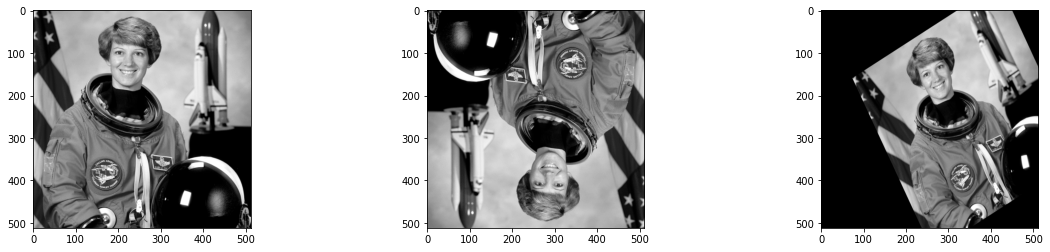

In [58]:
img1 = rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img3 = transform.warp(img1, tform)

fig, axes = plt.subplots(ncols=3, figsize=(20, 4))
axes[0].imshow(img1, cmap=plt.cm.gray)
axes[1].imshow(img2, cmap=plt.cm.gray)
axes[2].imshow(img3, cmap=plt.cm.gray);

# Example: Extract SIFT descriptors

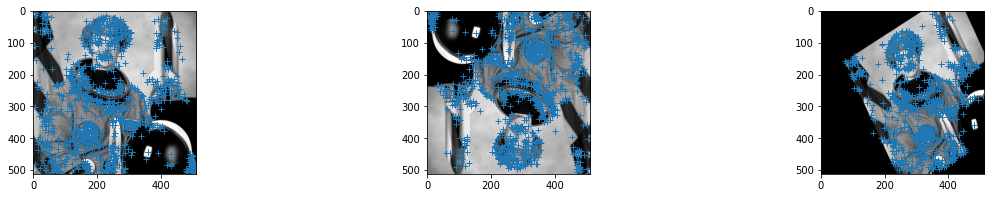

In [114]:
descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

fig, axes = plt.subplots(ncols=3, figsize=(20, 3))
axes[0].imshow(img1, cmap=plt.cm.gray); axes[0].plot(keypoints1[:, 1], keypoints1[:, 0], marker="+", linestyle='None')
axes[1].imshow(img2, cmap=plt.cm.gray); axes[1].plot(keypoints2[:, 1], keypoints2[:, 0], marker="+", linestyle='None')
axes[2].imshow(img3, cmap=plt.cm.gray); axes[2].plot(keypoints3[:, 1], keypoints3[:, 0], marker="+", linestyle='None');

# Example: Match Descriptors

In [62]:
matches12 = match_descriptors(
    descriptors1, descriptors2, max_ratio=0.6, cross_check=True)
matches13 = match_descriptors(
    descriptors1, descriptors3, max_ratio=0.6, cross_check=True)

# Example: Plot the Results

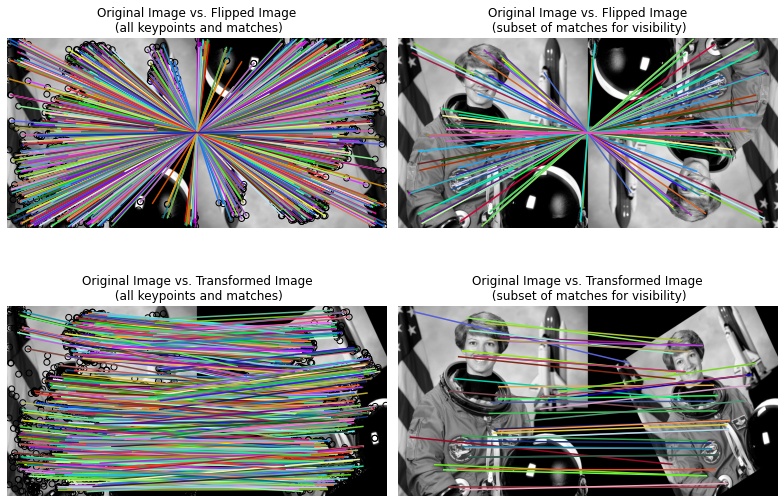

In [65]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8)); plt.gray()
plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
ax[0, 0].axis('off'); ax[0, 0].set_title("Original Image vs. Flipped Image\n (all keypoints and matches)")
plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
ax[1, 0].axis('off'); ax[1, 0].set_title("Original Image vs. Transformed Image\n (all keypoints and matches)")
plot_matches(ax[0, 1], img1, img2, keypoints1, keypoints2, matches12[::15], only_matches=True)
ax[0, 1].axis('off'); ax[0, 1].set_title("Original Image vs. Flipped Image\n (subset of matches for visibility)")
plot_matches(ax[1, 1], img1, img3, keypoints1, keypoints3, matches13[::15], only_matches=True)
ax[1, 1].axis('off'); ax[1, 1].set_title("Original Image vs. Transformed Image\n (subset of matches for visibility)")
plt.tight_layout(); plt.show()

# Feature Detection, Matching, Segmentation

- [Point and Patches](#sec-syllabus)

- **[Edges and Contours](#sec-ece)**

- [Contour Tracking](#sec-ece)

- [Segmentation](#sec-ece)

# Why Edges and Contours?

Last lecture: $\color{#EF5645}{\text{Keypoints}}$:
- Find image locations that can be accurately matched.
- No semantic information, no understanding of the image scene.


<center><img src="figs/03_main2.png" width=700px alt="default"/></center>


# Why Edges and Contours?


This lecture: $\color{#EF5645}{\text{Edges and Contours}}$:
- Find semantic information, as edges correspond to:
  - discontinuities in depth (different objects),
  - discontinuities in surface orientation (shapes of objects),
  - changes in material properties (texture of objects), etc.
- Reduce the amount of data to be processed for image interpretation
    - filter out irrelevant information, keep important structural properties 

$\color{#047C91}{\text{Example}}$: Young children easily recognize familiar objects by line drawings.
  
  
<center><img src="figs/03_human_edges_notxt.jpg" width=520px alt="default"/></center>

# Why Edges and Contours?

$\color{#047C91}{\text{Applications of Edges and Contours Detection}}$:
- Finger print matching
- Medical imaging diagnosis
- License plate detection

<center><img src="figs/03_prints.jpeg" width=600px alt="default"/></center>

# Why Edges and Contours?

$\color{#047C91}{\text{Applications of Edges and Contours Detection}}$:
- Finger print matching
- Medical imaging diagnosis
- License plate detection

<center><img src="figs/03_medical.jpeg" width=700px alt="default"/></center>

# Why Edges and Contours?

$\color{#047C91}{\text{Applications of Edges and Contours Detection}}$:
- Finger print matching
- Medical imaging diagnosis
- License plate detection

<center><img src="figs/03_plate.png" width=600px alt="default"/></center>

# Edges and Contours: Humans v. Machines

- Humans have no problem detecting edges:
  - _"Divide the image into some number of segments, where the segments represent ’things’ or ’parts of things’ in the scene. The number of segments is up to you, as it depends on the image. Something between 2 and 30 is likely to be appropriate. It is important that all of the segments have approximately equal importance."_
- Edge detection is machine processing can be a complicated task.

  <center><img src="figs/03_human_edges.png" width=600px alt="default"/></center>

# Edges and Contours

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image. Edges are a set of connected pixels that forms a boundary between two disjoint regions. Edges may or may not form a closed shape. 

$\color{#EF5645}{\text{Contours}}$ are a set of connected pixels with the same intensity that forms a closed shape defining the boundary of an object.


<center><img src="figs/03_human_edges.png" width=800px alt="default"/></center>

# Edge Detector: Desiderata

- $\color{#047C91}{\text{Good Detection and Robustness to Noise}}$:
  - minimize probabilities of:
    - false positives: detecting spurious edges caused by noise
    - false negatives: missing real edges
- $\color{#047C91}{\text{Good Localization}}$:
  - edges detected must be as close as posible to the true edges
- $\color{#047C91}{\text{Single Response}}$:
  - return one point only for each true edge point.

<center><img src="figs/03_edge_criteria.png" width=380px alt="default"/></center>

# Recall: Sobel Detector

$\color{#EF5645}{\text{Sobel Operator}}$ is an edge extractor which is a separable combination of a horizontal central difference (so called because the horizontal derivative is centered on the pixel) and a vertical tent filter (to smooth the results). 

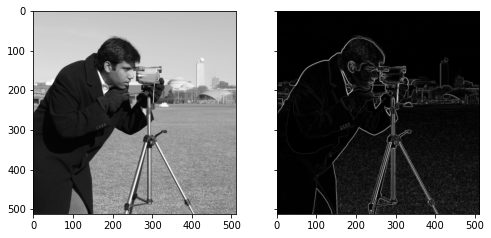

In [98]:
import matplotlib.pyplot as plt
import skimage

image = skimage.data.camera()
edge_sobel = skimage.filters.sobel(image)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
axes[0].imshow(image , cmap=plt.cm.gray)
axes[1].imshow(edge_sobel, cmap=plt.cm.gray);

# Many Detectors Available


<center><img src="figs/03_edge_detectors.png" width=800px alt="default"/></center>

= Basic building blocks for many applications. We will see some of them.

# Three Approaches to Edge Detection

Three approaches to edge detection:
- First Derivative:
  - Find local extrema of a first derivative operator (Sobel, Canny)
- Second Derivative:
  - Find "zero crossings" of a second derivative operator (Marr / Hildreth)
- Patterns:
  - Fit edge patterns such as lines or circles (Hough transform)

# Three Approaches to Edge Detection

Three approaches to edge detection:
- **First Derivative:**
  - **Find local extrema of a first derivative operator (Sobel, Canny)**
- Second Derivative:
  - Find "zero crossings" of a second derivative operator (Marr / Hildreth)
- Patterns:
  - Fit edge patterns such as lines or circles (Hough transform)

# Edge Detection: Intuition

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image.

<center><img src="figs/03_edge_intuition.png" width=1100px alt="default"/></center>

# Edge Detections: Using Gradients

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image.

The gradient $\nabla I (x, y) = (I_x, I_y)(x, y) = \left(\frac{\partial I}{\partial x},\frac{\partial I}{\partial y} \right)(x, y), $ of image $I$ is:
- $\frac{\partial I}{\partial x}(x, y) = \lim_{dx \rightarrow 0} \frac{I(x + dx, y) - I(x, y)}{dx} \simeq \frac{I(x+1, y) - I(x-1,y)}{2}$
- $\frac{\partial I}{\partial y}(x, y) = \lim_{dy \rightarrow 0} \frac{I(x, y+dy) - I(x, y)}{dy} \simeq \frac{I(x, y+1) - I(x, y-1)}{2}$

<center><img src="figs/03_gradient_f.png" width=1100px alt="default"/></center>
<center> Gradient of an image $f$</center>

# Edge Detections: Using Gradients

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image.

Gradient direction:
- is the direction of most increased intensity
- is equal to $\text{tan}^{-1}(\frac{I_y}{I_x})$
- is perpendicular to the direction of the edge



<center><img src="figs/03_gradient_f.png" width=1100px alt="default"/></center>
<center> Gradient of an image $f$</center>

# Edge Detections: Using Gradients

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image.


Gradient magnitude:
- is the magnitude of intensity change
- is equal to $||\nabla I|| = \sqrt{I_x^2 + I_y^2}$
- defines the strength of the edge.


<center><img src="figs/03_gradient_f.png" width=1100px alt="default"/></center>
<center> Gradient of an image $f$</center>

<center><img src="figs/03_intensity.png" width=1100px alt="default"/></center>

# Edge Detections: Using Gradients

$\color{#047C91}{\text{Good Detection and Robustness to Noise?}}$ 
- Computing gradients as a way to detect edges is not robust to noise.
- Because noise creates pixels that look very different from their neighbors:
  - Gradients does not find the edge in the presence of noise!

<center><img src="figs/03_gradient_and_noise.png" width=600px alt="default"/></center>



# Edge Detections: Gradients & Smoothing

$\color{#047C91}{\text{Good Detection and Robustness to Noise?}}$ 
- Computing gradients as a way to detect edges is not robust to noise,
- Because noise creates pixels that look very different from their neighbors.
- We can first smooth the image to make these pixels look more similar!

<center><img src="figs/03_gradient_and_noise_smooth.png" width=600px alt="default"/></center>


# Edge Detections: Gradients & Smoothing

Edges in image $I$ can be found:
- not by looking in peaks of $\nabla I$,
- but by looking in peaks of $\nabla (I \ast g)$, where $g$ is a smoothing kernel.

$\color{#EF5645}{\text{Remark}}$: It seems that we need two operations:
- Smoothing $I$ with $g$ via convolution $I \ast g$,
- Taking the gradient $\nabla (I \ast g)$.

$\rightarrow$ a useful theorem can help us do this in one operation.

# Edge Detections: Gradients & Smoothing

$\color{#EF5645}{\text{Derivative Theorem of Convolution}}$: Given two function $f, g$ and $\ast$ the convolution, we have: $\frac{\partial}{\partial x}(f \ast g) = f \ast \frac{\partial g}{\partial x}.$



<center><img src="figs/03_derivative_conv.png" width=700px alt="default"/></center>

$\rightarrow$ this saves us one operation.

# Gradients and Smoothing

$\color{#047C91}{\text{Good Localization and Single Response?}}$
- Smoothing removes noise and helps find the edge.
- But it can also blur the edge: 
  - there are trade-offs
  - finding the right level of smoothing can be tricky.

<center><img src="figs/03_edge_smoothing.png" width=800px alt="default"/></center>

# Sobel Detector

$\color{#EF5645}{\text{Sobel Operator}}$ is an edge extractor which is a separable combination of:
- a horizontal central difference:
  - because the horizontal derivative is centered on the pixel,
- a vertical tent filter:
  - smoothing.

<center><img src="figs/03_sobel.png" width=700px alt="default"/></center>

# Sobel Detector

$\color{#EF5645}{\text{Sobel Operator}}$ is an edge extractor which is a separable combination of:
- a horizontal central difference (so called because the horizontal derivative is centered on the pixel) and
- a vertical tent filter (to smooth the results),
It actually uses two such extractors: one for horizontal changes and one for vertical changes.

<center><img src="figs/03_sobel_xy.png" width=400px alt="default"/></center>

# Sobel Detector: Magnitude and Direction

Denoting $G_x$ (resp. $G_y$) the result of applying $G_x$ (resp. $G_y$) to $I$, we define:
- the magnitude of the edge as $G = \sqrt{G_x ^2 + G_y ^ 2}$
- the direction of the gradient as $\theta = \text{tan}^{-1}(\frac{G_y}{G_x})$.

$\rightarrow$ threshold to find the edges

# In Practice: Sobel Detector

In [12]:
import scipy.signal as signal
import skimage
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [21]:
def my_sobel(im):
    img = im.astype(np.float)

    kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
    kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    gx = signal.convolve2d(img, kh)#, mode='same', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(img, kv)#, mode='same', boundary = 'symm', fillvalue=0)
 
    g = np.sqrt(gx * gx + gy * gy)
    magnitude = g * 255.0 / np.max(g)
    direction = np.arctan(gy/gx)
   
    return magnitude, direction

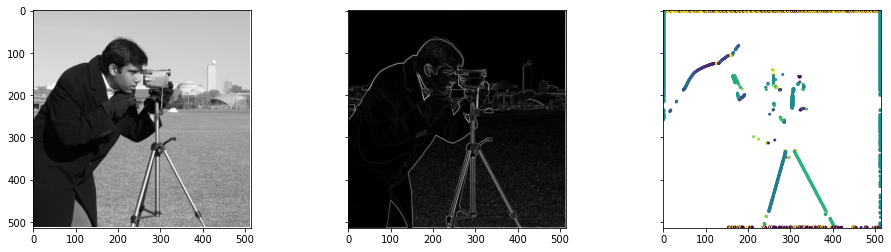

In [22]:
image = skimage.data.camera()
magnitude, direction = my_sobel(image)
detected_edges_points = np.where(magnitude > 155)
direction_points = [
    direction[i, j] 
    for i, j in zip(
        detected_edges_points[0], detected_edges_points[1])]

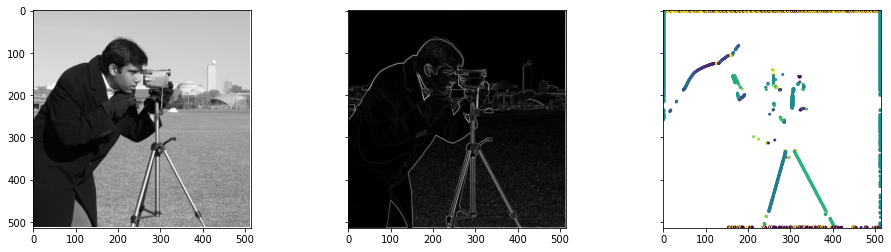

In [23]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image , cmap=plt.cm.gray)
axes[1].imshow(magnitude, cmap=plt.cm.gray);
axes[2].scatter(
    detected_edges_points[1], 
    detected_edges_points[0], 
    cmap="viridis", 
    c=direction_points, 
    s=4)
axes[2].set_aspect('equal', 'box')

# Sobel Detector: Limitations

$\color{#047C91}{\text{Good Detection?}}$
- May miss obliques edges more than horizontal and vertical edges: false negatives


$\color{#047C91}{\text{Good Localization?}}$
- Sobel Detector can have poor localization, and trigger response in multiple adjacent pixels

$\rightarrow$ Move to the Canny Detector, one of the most used detectors.

# Canny Detector


$\color{#EF5645}{\text{Canny Detector}}$ is an edge extractor which detects edges via the following steps:
- Gradients and Smoothing: Convolve with derivatives of Gaussian filter
- Gradient magnitude and direction: Similar to the Sobel detector
- Non-maximum suppression for $\color{#047C91}{\text{Good Localization}}$
  - Thin multi-pixel wide "ridges" down to single pixel width
- Linking and thresholding for $\color{#047C91}{\text{Good Detection}}$
  - Low, high edge-strength thresholds
  - Accept all edges over low threshold that are connected to edge over high threshold

# Canny Detector: Non-Maxima Suppression

- Non-maximum suppression for $\color{#047C91}{\text{Good Localization}}$
  - Thin multi-pixel wide "ridges" down to single pixel width
    - Select the image maximum point across the width of the edge


<center><img src="figs/03_nonmax_spp.png" width=400px alt="default"/></center>

# Canny Detector: Non-Maxima Suppression

- Non-maximum suppression for $\color{#047C91}{\text{Good Localization}}$
  - Thin multi-pixel wide "ridges" down to single pixel width
    - Select the image maximum point across the width of the edge
    - Value at q must be larger than interpolated values at p and r


<center><img src="figs/03_nonmax_spp2.png" width=400px alt="default"/></center>

In [24]:
# From: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [25]:
image = skimage.data.camera()
magnitude, direction = my_sobel(image)
magnitude_thin = non_max_suppression(magnitude, direction)

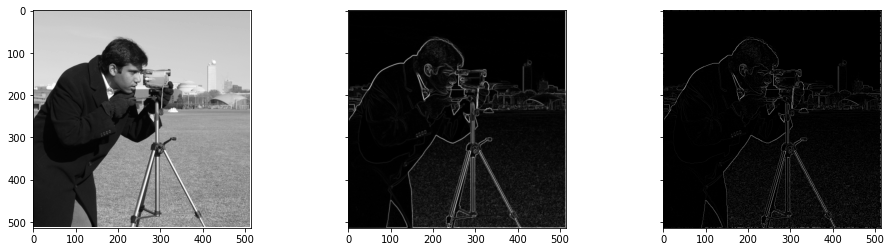

In [28]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(magnitude, cmap=plt.cm.gray)
axes[2].imshow(magnitude_thin, cmap=plt.cm.gray);

# Canny Detector: Linking and thresholding


- Linking and thresholding for $\color{#047C91}{\text{Good Detection}}$
  - Define low, high edge-strength thresholds $k_{low}, k_{high}$, typically: $\frac{k_{high}}{k_{low}} = 2$.
  - Use $k_{high}$ to find strong edges to start edge chain
  - Get continuation point (r or s) through normal to the gradient at the edge point.
  - Accept continuation point if $>k_{low}$.



<center><img src="figs/03_linking.png" width=150px alt="default"/></center>

# Canny Detector: Linking and thresholding


- Linking and thresholding for $\color{#047C91}{\text{Good Detection}}$
  - Define low, high edge-strength thresholds $k_{low}, k_{high}$, typically: $\frac{k_{high}}{k_{low}} = 2$.
  - Use $k_{high}$ to find strong edges to start edge chain
  - Get continuation point (r or s) through normal to the gradient at the edge point.
  - Accept continuation point if $>k_{low}$.

$\rightarrow$ $\color{#EF5645}{\text{Hysteresis:}}$ A lag or momentum factor.


<center><img src="figs/03_hysteresis.png" width=550px alt="default"/></center>

In [29]:
# From: https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [30]:
# From: https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

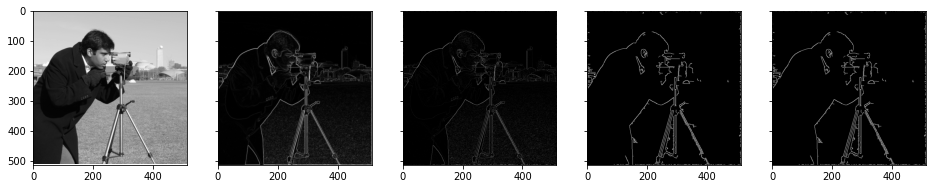

In [44]:
magnitude_weak_strong, weak, strong = threshold(magnitude_thin, lowThresholdRatio=0.001, highThresholdRatio=0.45)
result = hysteresis(magnitude_weak_strong, weak, strong)

fig, axes = plt.subplots(ncols=5, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(magnitude, cmap=plt.cm.gray)
axes[2].imshow(magnitude_thin, cmap=plt.cm.gray)
axes[3].imshow(magnitude_weak_strong, cmap=plt.cm.gray);
axes[4].imshow(result, cmap=plt.cm.gray);

# Effect of Gaussian Kernel size $\sigma$

Choice of $\sigma$ depends on desired behavior:
- large $\sigma$: large scale edges
- small $\sigma$: fine features

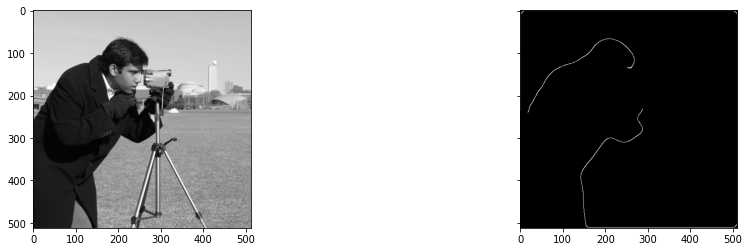

In [89]:
image = skimage.data.camera()
skimage_canny = skimage.feature.canny(image, sigma=10)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(skimage_canny, cmap=plt.cm.gray);

# From First Derivatives to Second Derivatives

Three approaches to edge point detection:
- (significant) local extrema of a first derivative operator (Sobel, Canny)
- **"zero crossings" of a second derivative operator (Marr / Hildreth)**
- Fit patterns (Hough-transform)


<center><img src="figs/03_second.png" width=200px alt="default"/></center>

# Marr / Hildreth Edge Detector


$\color{#EF5645}{\text{Marr / Hildreth Algorithm}}$ is an edge extractor which detects edges via smoothing and second derivative:
- Smoothing: Gaussian filter
- Second Derivative: Laplacian $\nabla^2 I(x, y) = \frac{\partial^2 I (x, y)}{\partial x^2} + \frac{\partial^2 I (x, y)}{\partial y^2}$
- $\rightarrow$ Locate zero-crossings in the Laplacian of the Gaussian (LoG):
$$\nabla^2 G(x, y) = - \frac{1}{2\pi\sigma^4}\left(2 - \frac{x^2+y^2}{\sigma^2} \right)\exp \left(-\frac{x^2+y^2}{2\sigma^2}\right).$$


# Marr / Hildreth Edge Detector


$\color{#EF5645}{\text{Marr / Hildreth Algorithm}}$ is an edge extractor which detects edges via smoothing and second derivative.

<center><img src="figs/03_edge_mh.png" width=500px alt="default"/></center>

# Marr / Hildreth Edge Detector


$\color{#EF5645}{\text{Marr / Hildreth Algorithm}}$ is an edge extractor which detects edges via smoothing and second derivative.


<center><img src="figs/03_log.png" width=500px alt="default"/></center>

In practice:
- replace the Laplacian of Gaussian convolution with a difference of Gaussian (DoG) computation,  
  - convenient if a "Laplacian pyramid" has been computed

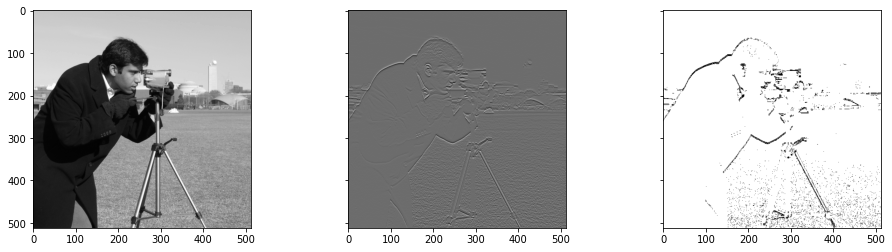

In [86]:
import skimage.filters

image = skimage.data.camera()
filtered_image = skimage.filters.difference_of_gaussians(
    image, low_sigma=0.01, high_sigma=2, channel_axis=-1)
edges = np.abs(filtered_image) < 0.1

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(filtered_image, cmap=plt.cm.gray)
axes[2].imshow(edges, cmap=plt.cm.gray);

# Hough Transform


$\color{#EF5645}{\text{The Hough transform}}$ is a transform that can be used to detect lines, and thus edges, via the following steps:
- Performed an edge detection algorithm: extract partial contours
- Complete the edge's into contours by fitting lines through the points.




# Hough Transform: Find Straight Lines


$\color{#EF5645}{\text{The Hough transform}}$ is a transform that can be used to detect lines, and thus edges, via the following steps:
- Performed an edge detection algorithm: extract partial contours
- Complete the edge's into contours by fitting lines through the points. 
  - Consider a point $(x_i, y_i)$ on the partial edge.
  - Line passing through: $y_i = a x_i + b$, rewritten as: $b = - a x_i +y_i$
    - One point give a line of slope $x_i$ and intercept $y_i$ in $(a, b)$ space.
  - Find $(a, b)$ where several lines meet in $(a, b)$ space: number of votes.
  
  
 <center><img src="figs/03_hough.png" width=500px alt="default"/></center>

$\color{#EF5645}{\text{The Hough transform}}$ is a transform that can be used to detect lines, and thus edges, via the following steps:
- Performed an edge detection algorithm: extract partial contours
- Complete the edge's into contours by fitting lines through the points.

 <center><img src="figs/03_hough2.png" width=500px alt="default"/></center>



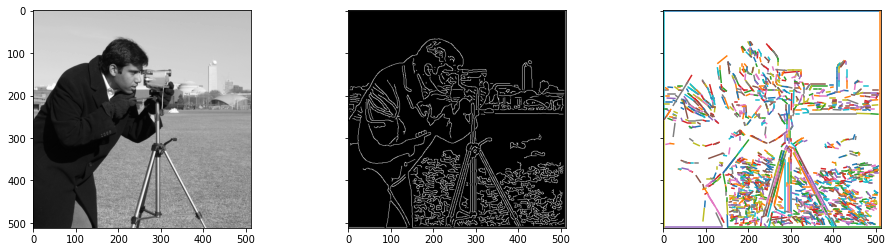

In [97]:
from skimage.transform import probabilistic_hough_line

image = skimage.data.camera()
edges = skimage.feature.canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(edges, cmap=plt.cm.gray)
for line in lines:
    p0, p1 = line
    axes[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
    axes[2].set_aspect('equal', 'box')

# Hough Transform: Limitations

Pros:
- Conceptually simple and easy implementation
- $\color{#047C91}{\text{Good Detection and Robustness to Noise}}$: handles missing data
- Can be adapted to other types of form beyond lines.

Cons:
- Looks for only a single type of edge at a time
- Can only detect edges if their parametric equation is known.
- Colinear line cannot be separated: No $\color{#047C91}{\text{Single Response}}$.



# Feature Detection, Matching, Segmentation

- **[Point and Patches](#sec-syllabus)**

- [Edges and Contours](#sec-ece)

- [Contour Tracking](#sec-ece)

- [Segmentation](#sec-ece)